In [1]:
#loading libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.ExcelFile(r'C:\Users\OLAMIDE\Desktop\MACHINE_LEARNING_PROJECTS\Students_knowledge_level_prediction\data.xls')

In [3]:
train_data = pd.read_excel(data,sheet_name='Training_Data')
train_data = train_data.drop(['Attribute Information:','Unnamed: 7','Unnamed: 6'],axis=1)

In [4]:
b = []
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoded = encoder.fit_transform(train_data[' UNS'])
b.append(encoded)
new_data = pd.DataFrame(b)
encoded_data = new_data.transpose()
encoded_data
encoded_data.columns = ['encoded_data']
train_data = train_data.join(encoded_data['encoded_data'])
train_data

,STG,SCG,STR,LPR,PEG,UNS,encoded_data
0,0.00,0.00,0.00,0.00,0.00,very_low,3
1,0.08,0.08,0.10,0.24,0.90,High,0
2,0.06,0.06,0.05,0.25,0.33,Low,1
3,0.10,0.10,0.15,0.65,0.30,Middle,2
4,0.08,0.08,0.08,0.98,0.24,Low,1
...,...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High,0
254,0.78,0.61,0.71,0.19,0.60,Middle,2
255,0.54,0.82,0.71,0.29,0.77,High,0
256,0.50,0.75,0.81,0.61,0.26,Middle,2


In [5]:
test_data = pd.read_excel(data,sheet_name='Test_Data')
test_data = test_data.drop(['Attribute Information:','Unnamed: 7','Unnamed: 6'],axis=1)

In [6]:
b = []
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoded = encoder.fit_transform(test_data[' UNS'])
b.append(encoded)
new_data = pd.DataFrame(b)
encoded_data = new_data.transpose()
encoded_data
encoded_data.columns = ['encoded_data']
test_data = test_data.join(encoded_data['encoded_data'])
test_data

,STG,SCG,STR,LPR,PEG,UNS,encoded_data
0,0.00,0.10,0.50,0.26,0.05,Very Low,3
1,0.05,0.05,0.55,0.60,0.14,Low,1
2,0.08,0.18,0.63,0.60,0.85,High,0
3,0.20,0.20,0.68,0.67,0.85,High,0
4,0.22,0.22,0.90,0.30,0.90,High,0
...,...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,High,0
141,0.85,0.82,0.66,0.83,0.83,High,0
142,0.56,0.60,0.77,0.13,0.32,Low,1
143,0.66,0.68,0.81,0.57,0.57,Middle,2


In [7]:
featurestrain = train_data.drop([' UNS','encoded_data'], axis=1)
targettrain = train_data['encoded_data']

In [8]:
featurestest = test_data.drop([' UNS','encoded_data'], axis=1)
targettest = test_data['encoded_data']

In [9]:
mapping = {'High':0,'Low':1,'Middle':2,'VeryLow':3}
k = {0:'High',1:'Low',2:'Middle',3:'VeryLow'}

CLASSIFICATION USING NAIVE BAYES CLASSIFICATION

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(featurestrain, targettrain)
Predicted = model.predict(featurestest)
Predicted

array([3, 1, 0, 0, 0, 1, 2, 1, 0, 3, 2, 3, 0, 1, 0, 3, 0, 3, 1, 2, 0, 1,
       1, 1, 2, 3, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1,
       0, 1, 2, 1, 0, 3, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 1, 2, 1,
       2, 1, 0, 3, 0, 3, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 3, 1, 2, 1, 0, 3,
       1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 3, 1, 2, 1, 2, 1, 3, 1, 2, 2, 2, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 3, 0, 1, 0, 3, 0, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1], dtype=int64)

In [11]:
predicte = model.predict([[0.00,0.10,0.50,0.26,0.05]])
print("Predicted Value:", k[predicte[0]])

Predicted Value: VeryLow


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(targettest, Predicted)

0.8413793103448276

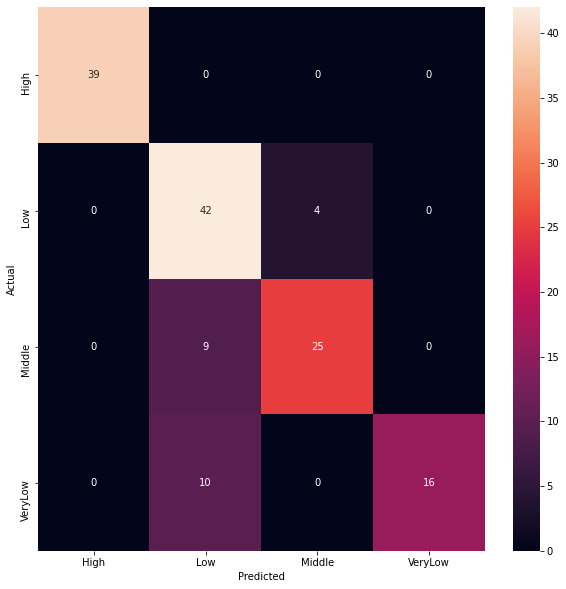

In [13]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(targettest,Predicted)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=mapping,yticklabels=mapping)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

SUPPORT VECTOR MACHINE LINEAR AND RADIAL BASIS CLASSIFICATION

In [14]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear', C=1E10)
svc_model.fit(featurestrain, targettrain)
svc_Predicted = svc_model.predict(featurestest)

In [15]:
svc_Predicted

array([3, 1, 0, 0, 0, 1, 2, 1, 0, 3, 2, 3, 0, 2, 0, 3, 0, 3, 1, 2, 0, 1,
       2, 1, 2, 3, 1, 2, 2, 3, 1, 1, 2, 0, 1, 2, 1, 0, 2, 2, 3, 1, 0, 3,
       0, 3, 0, 2, 0, 3, 2, 3, 0, 3, 0, 3, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1,
       2, 2, 0, 3, 0, 3, 0, 0, 1, 0, 1, 0, 0, 2, 0, 3, 3, 1, 2, 1, 0, 3,
       1, 0, 1, 2, 1, 3, 1, 2, 0, 2, 3, 1, 2, 1, 2, 2, 3, 1, 2, 2, 1, 0,
       1, 1, 3, 2, 2, 1, 0, 1, 2, 0, 0, 3, 1, 2, 3, 0, 1, 0, 3, 0, 1, 1,
       0, 1, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 2], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(targettest, svc_Predicted)

0.9517241379310345

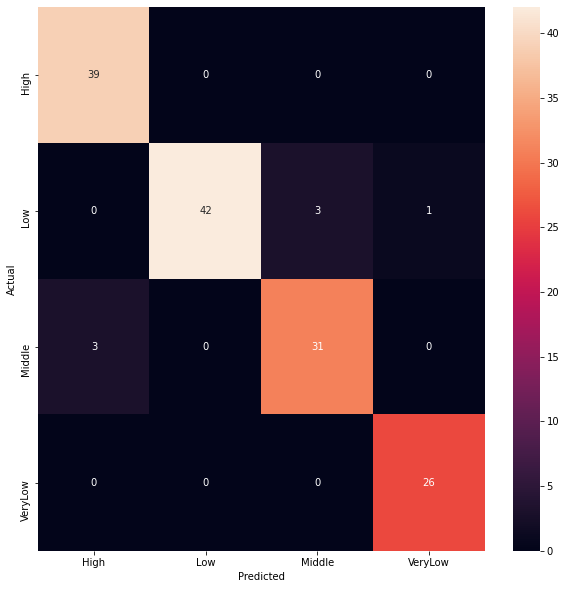

In [17]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(targettest,svc_Predicted)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=mapping, yticklabels=mapping)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [18]:
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [22]:
pca = RandomizedPCA(n_components=5, whiten=True, random_state=42)
svc_r_model = SVC(kernel='rbf', class_weight='balanced')
r_model = make_pipeline(pca, svc_r_model)

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 10, 50],'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(r_model, param_grid)

In [24]:
grid.fit(featurestrain,targettrain)
print(grid.best_params_)

{'svc__C': 50, 'svc__gamma': 0.005}


In [25]:
best_model = grid.best_estimator_
svc_r_predicted = best_model.predict(featurestest)

In [26]:
svc_r_predicted

array([3, 1, 0, 0, 0, 1, 2, 1, 0, 3, 2, 3, 0, 1, 0, 3, 0, 3, 1, 2, 0, 1,
       1, 1, 2, 3, 1, 2, 2, 3, 1, 1, 2, 0, 1, 2, 1, 0, 2, 2, 3, 1, 0, 3,
       0, 3, 2, 2, 0, 3, 2, 3, 0, 3, 0, 3, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1,
       2, 1, 0, 3, 0, 3, 0, 0, 1, 0, 1, 0, 0, 2, 0, 3, 3, 1, 2, 1, 0, 3,
       1, 0, 1, 1, 1, 3, 1, 2, 0, 1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 2, 1, 0,
       1, 1, 3, 2, 2, 1, 0, 1, 2, 0, 0, 3, 1, 2, 3, 0, 1, 0, 3, 0, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(targettest, svc_r_predicted)

0.9793103448275862

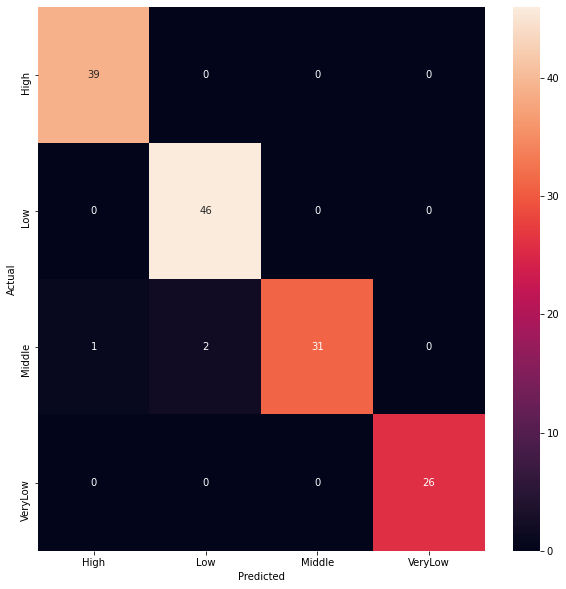

In [28]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(targettest,svc_r_predicted)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=mapping, yticklabels=mapping)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(targettest, svc_r_predicted,target_names=mapping))

              precision    recall  f1-score   support

        High       0.97      1.00      0.99        39
         Low       0.96      1.00      0.98        46
      Middle       1.00      0.91      0.95        34
     VeryLow       1.00      1.00      1.00        26

    accuracy                           0.98       145
   macro avg       0.98      0.98      0.98       145
weighted avg       0.98      0.98      0.98       145



RANDOMFOREST CLASSIFICATION

In [30]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
forest_model.fit(featurestrain, targettrain)
forest_Predicted = svc_model.predict(featurestest)
forest_Predicted

array([3, 1, 0, 0, 0, 1, 2, 1, 0, 3, 2, 3, 0, 2, 0, 3, 0, 3, 1, 2, 0, 1,
       2, 1, 2, 3, 1, 2, 2, 3, 1, 1, 2, 0, 1, 2, 1, 0, 2, 2, 3, 1, 0, 3,
       0, 3, 0, 2, 0, 3, 2, 3, 0, 3, 0, 3, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1,
       2, 2, 0, 3, 0, 3, 0, 0, 1, 0, 1, 0, 0, 2, 0, 3, 3, 1, 2, 1, 0, 3,
       1, 0, 1, 2, 1, 3, 1, 2, 0, 2, 3, 1, 2, 1, 2, 2, 3, 1, 2, 2, 1, 0,
       1, 1, 3, 2, 2, 1, 0, 1, 2, 0, 0, 3, 1, 2, 3, 0, 1, 0, 3, 0, 1, 1,
       0, 1, 2, 1, 3, 1, 1, 1, 0, 0, 1, 0, 2], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(targettest, forest_Predicted)

0.9517241379310345

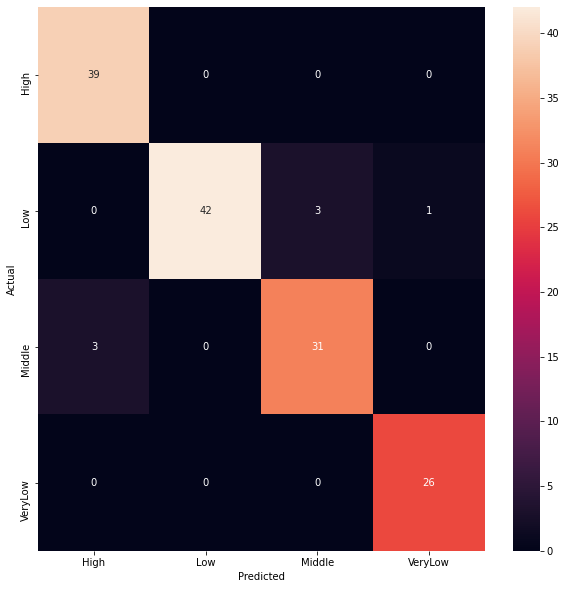

In [32]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(targettest,forest_Predicted)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=mapping, yticklabels=mapping)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()